In [20]:
import cv2 as cv
import numpy as np  
import matplotlib.pyplot as plt
import gc as gc

In [21]:
#读取
img = cv.imread('einstein.jpg')

**cv.cvtColor(input_image, flag)用于颜色空间的转换**
 
|参数                            |描述                                  |返回值                                                   |
|:---:                          |:----:                                |:---:                                                    |
|input_image                    |需要转换的图片                         |颜色空间转换后的图片矩阵                                    |
|flag                           | 转换的类型                            |颜色空间转换后的图片矩阵                                   |



**其中转换格式为：**
|类型                    |描述                |
|:---:                   | :---:             |
| cv.COLOR_BGR2GRAY     | BGR -> Gray       |
| cv.COLOR_BGR2RGB      | BGR -> RGB        |
| cv.COLOR_BGR2HSV      | BGR -> HSV        |

In [22]:
#转换为灰度图像
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
h = grayImg.shape[0]
w = grayImg.shape[1]

## **线性运算**

![](information\linear_function.jpg)

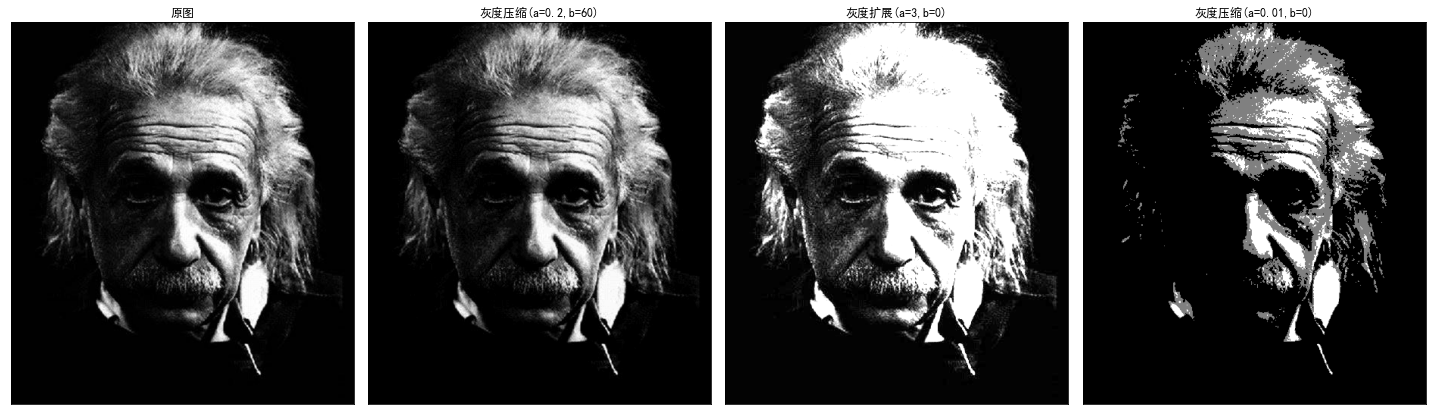

6983

In [23]:
#灰度压缩 0<a<1,b>0
a1 = 0.2 
b1 = 60  #设置参数
linear_trans = np.zeros((h, w), np.uint8)
for i in range(h):
    for j in range(w):
        if (int(a1*grayImg[i, j]+b1) <= 255):
            gray = int(a1*grayImg[i, j] + b1 )
        else:
            gray = 255
        linear_trans[i, j] = np.uint8(gray)
#灰度扩展 a>1,b=0
a2 = 3 #参数设置
b2 = 0
linear_enhanc = np.zeros((h, w), np.uint8)
for i in range(h):
    for j in range(w):
        if (a2*grayImg[i,j] > 255):
            gray = 255
        else:
            gray = int(a2*grayImg[i,j])
        linear_enhanc[i,j] = np.uint8(gray)

#灰度压缩 0<a<1,b=0
a3=0.01 #参数设置
b3 = 0 
linear_decrease = np.zeros((h, w), np.uint8)
for i in range(h):
    for j in range(w):
        gray = int(a3*grayImg[i,j])
        linear_decrease[i,j] = np.uint8(gray)

#显示
plt.figure(figsize=(20, 20))
out='原图'
plt.subplot(141), plt.imshow(grayImg,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='灰度压缩(a=' + str(a1) + ',b=' + str(b1) +')'
plt.subplot(142), plt.imshow(linear_trans,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='灰度扩展(a=' + str(a2) + ',b=' + str(b2) +')'
plt.subplot(143), plt.imshow(linear_enhanc,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='灰度压缩(a=' + str(a3) + ',b=' + str(b3) +')'
plt.subplot(144), plt.imshow(linear_decrease,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout(), plt.show()

#清理内存
del a1,a2,a3,b1,b2,b3
gc.collect()

#### **分段线性的思想：将感兴趣的灰度范围线性扩展，相对抑制不感兴趣的灰度区域。**
![](information\fenduan_function.jpg)

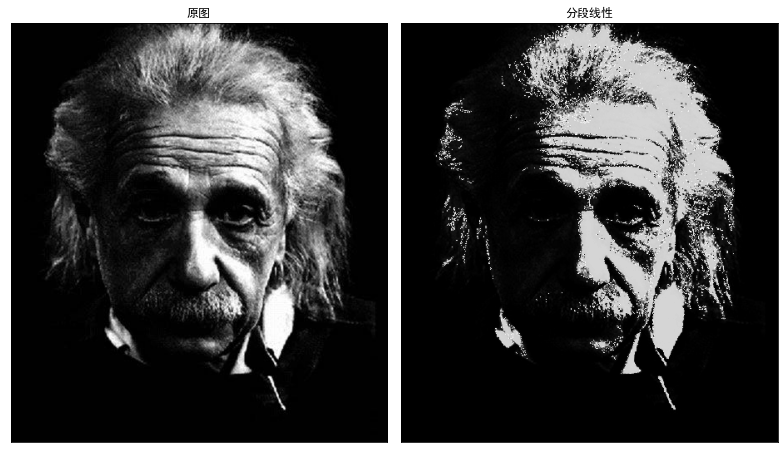

(None, None)

In [24]:
#分段线性 取a=75，b=155
result1 = np.zeros((h, w), np.uint8)
for x in range(1,h):
    for y in range(1,w):
        if(grayImg[x,y] <= 75):  
            result1[x,y] = int(grayImg[x,y] *50 / 160)
        elif(grayImg[x,y] >75 and grayImg[x,y] <= 155):
            result1[x,y] = int((150 / 40.0) * (grayImg[x,y] - 100) + 50)  
        else:
            result1[x,y] = int((5 / 60) * (grayImg[x,y] - 100) + 200)
plt.figure(figsize=(11, 11))
plt.subplot(121), plt.imshow(grayImg, 'gray'), plt.title('原图'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result1, 'gray'), plt.title('分段线性'), plt.xticks([]), plt.yticks([])
plt.tight_layout(),plt.show()

## **非线性点运算**

![](information\power_function.jpg)

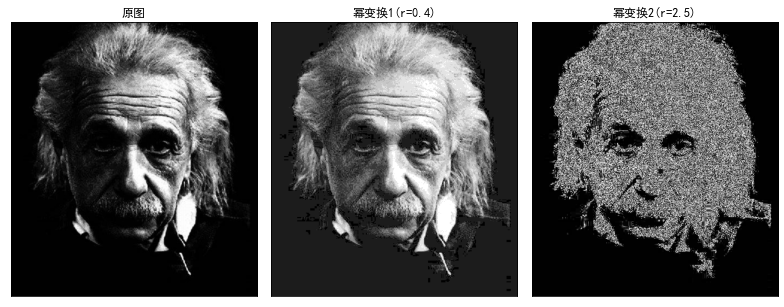

8845

In [25]:
#幂变换
#因为起主要作用的是参数r，所以这里默认c=1
r1 = 0.4
r2 = 2.5 
result2 = np.zeros((h,w) , np.uint8) #result1在上已声明
for i in range(h):
    for j in range(w):
        result1[i,j] = np.uint8( int(grayImg[i,j]**r1) )
        result2[i,j] = np.uint8( int(grayImg[i,j]**r2) )

#显示
plt.figure(figsize=(11, 11))
out='原图'
plt.subplot(131), plt.imshow(grayImg,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='幂变换1(r=' + str(r1) + ')'
plt.subplot(132), plt.imshow(result1,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='幂变换2(r=' + str(r2) + ')'
plt.subplot(133), plt.imshow(result2,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
plt.tight_layout(), plt.show()

#清理内存
del r1,r2
gc.collect()

![](information\Log_function.jpg)

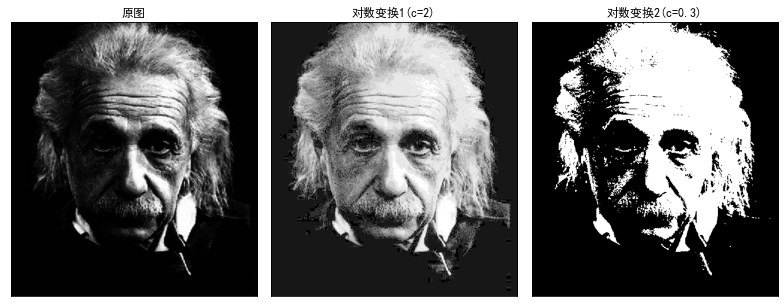

5276

In [26]:
#对数变换
def log(c, img):
    result = c * np.log(1.0 + img)
    return result
c1 = 2
c2 = 0.3

for i in range(h):
    for j in range(w):
        result1[i,j] = log(2,grayImg[i,j])
        result2[i,j] = log(0.3,grayImg[i,j])

#显示
plt.figure(figsize=(11, 11))
out='原图'
plt.subplot(131), plt.imshow(grayImg,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='对数变换1(c=' + str(c1) + ')'
plt.subplot(132), plt.imshow(result1,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
out='对数变换2(c=' + str(c2) + ')'
plt.subplot(133), plt.imshow(result2,'gray'), plt.title(out), plt.xticks([]), plt.yticks([])
plt.tight_layout(), plt.show()

#清理内存
del c1,c2,out
gc.collect()